# Categorical Data

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import category_encoders as ce

%matplotlib inline

# Identifying Categorical Data: Nominal, Ordinal and Continuous

In [2]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

In [3]:
df_flights.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2014      1    1       1.0       96.0     235.0       70.0      AS  N508AS   
1  2014      1    1       4.0       -6.0     738.0      -23.0      US  N195UW   
2  2014      1    1       8.0       13.0     548.0       -4.0      UA  N37422   
3  2014      1    1      28.0       -2.0     800.0      -23.0      US  N547UW   
4  2014      1    1      34.0       44.0     325.0       43.0      AS  N762AS   

   flight origin dest  air_time  distance  hour  minute  
0     145    PDX  ANC     194.0      1542   0.0     1.0  
1    1830    SEA  CLT     252.0      2279   0.0     4.0  
2    1609    PDX  IAH     201.0      1825   0.0     8.0  
3     466    PDX  CLT     251.0      2282   0.0    28.0  
4     121    SEA  ANC     201.0      1448   0.0    34.0

In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


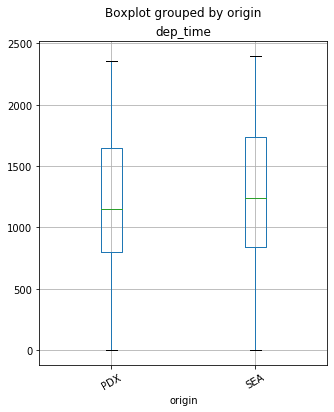

In [5]:
df_flights.boxplot('dep_time', 'origin',rot = 30, figsize=(5,6))

In [6]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [7]:
cat_df_flights.head()

carrier tailnum origin dest
0      AS  N508AS    PDX  ANC
1      US  N195UW    SEA  CLT
2      UA  N37422    PDX  IAH
3      US  N547UW    PDX  CLT
4      AS  N762AS    SEA  ANC

In [8]:
cat_df_flights.isnull().values.sum()

248

In [9]:
cat_df_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [11]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

In [12]:
cat_df_flights.isnull().values.sum()

0

In [13]:
carrier_count = cat_df_flights['carrier'].value_counts()

In [14]:
carrier_count

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

In [15]:
carrier_count.count()

11

In [16]:
carrier_count.index

Index(['AS', 'WN', 'OO', 'DL', 'UA', 'AA', 'US', 'B6', 'VX', 'F9', 'HA'], dtype='object')

In [17]:
carrier_count.values

array([62460, 23355, 18710, 16716, 16671,  7586,  5946,  3540,  3272,
        2698,  1095], dtype=int64)

In [18]:
sns.set_style('darkgrid')

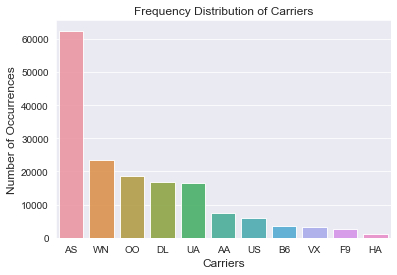

In [19]:
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.xlabel('Carriers', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

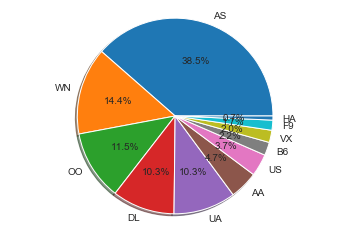

In [20]:
plt.pie(carrier_count.values,
        labels=carrier_count.index,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

# Encoding Categorical Data

## Replacing values

In [21]:
replace_map_comp = {'carrier' :{val:idx 
                                for idx, val in enumerate(cat_df_flights['carrier']
                                                          .astype('category')
                                                          .cat.categories.tolist())}}

In [22]:
replace_map_comp

{'carrier': {'AA': 0,
  'AS': 1,
  'B6': 2,
  'DL': 3,
  'F9': 4,
  'HA': 5,
  'OO': 6,
  'UA': 7,
  'US': 8,
  'VX': 9,
  'WN': 10}}

In [23]:
cat_df_flights_replace = cat_df_flights.copy()

In [24]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

In [25]:
cat_df_flights_replace.head()

carrier tailnum origin dest
0        1  N508AS    PDX  ANC
1        8  N195UW    SEA  CLT
2        7  N37422    PDX  IAH
3        8  N547UW    PDX  CLT
4        1  N762AS    SEA  ANC

In [26]:
cat_df_flights_replace['carrier'].dtypes

dtype('int64')

## Encoding labels

In [27]:
cat_df_flights_lc = cat_df_flights.copy()

In [28]:
# typecasting categorical features to a category dtype to make it faster than object dtype
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')

In [29]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [30]:
cat_df_flights_lc.head()

carrier tailnum origin dest
0        1  N508AS    PDX  ANC
1        8  N195UW    SEA  CLT
2        7  N37422    PDX  IAH
3        8  N547UW    PDX  CLT
4        1  N762AS    SEA  ANC

In [31]:
cat_df_flights_specific = cat_df_flights.copy()

In [32]:
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

In [33]:
cat_df_flights_specific.head()

carrier tailnum origin dest  US_code
0      AS  N508AS    PDX  ANC        0
1      US  N195UW    SEA  CLT        1
2      UA  N37422    PDX  IAH        0
3      US  N547UW    PDX  CLT        1
4      AS  N762AS    SEA  ANC        0

In [34]:
cat_df_flights_sklearn = cat_df_flights.copy()

In [35]:
lb_make = LabelEncoder()

In [36]:
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights_sklearn['carrier'])

In [37]:
cat_df_flights_sklearn.head()

carrier tailnum origin dest  carrier_code
0      AS  N508AS    PDX  ANC             1
1      US  N195UW    SEA  CLT             8
2      UA  N37422    PDX  IAH             7
3      US  N547UW    PDX  CLT             8
4      AS  N762AS    SEA  ANC             1

## One-Hot encoding

In [38]:
cat_df_flights_onehot = cat_df_flights.copy()

In [39]:
# cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier', 'dest'], prefix=['carrier', 'dest'])
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix=['carrier'])

In [40]:
cat_df_flights_onehot.head()

tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0

In [41]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

In [42]:
lb = LabelBinarizer()

In [43]:
lb_result = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])

In [44]:
lb_result_df = pd.DataFrame(lb_result, columns=lb.classes_)

In [45]:
lb_result_df.head()

AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0

In [46]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_result_df], axis=1)

In [47]:
result_df.head()

carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0

## Binary encoding

In [48]:
cat_df_flights_ce = cat_df_flights.copy()

In [49]:
encoder = ce.BinaryEncoder(cols=['carrier'])

In [50]:
df_binary = encoder.fit_transform(cat_df_flights_ce)

In [51]:
df_binary.head()

carrier_0  carrier_1  carrier_2  carrier_3  carrier_4 tailnum origin dest
0          0          0          0          0          1  N508AS    PDX  ANC
1          0          0          0          1          0  N195UW    SEA  CLT
2          0          0          0          1          1  N37422    PDX  IAH
3          0          0          0          1          0  N547UW    PDX  CLT
4          0          0          0          0          1  N762AS    SEA  ANC

## Backward difference encoding

In [52]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])

In [53]:
df_bd = encoder.fit_transform(cat_df_flights_ce)

In [54]:
df_bd.head()

intercept  carrier_0  carrier_1  carrier_2  carrier_3  carrier_4  \
0          1  -0.909091  -0.818182  -0.727273  -0.636364  -0.545455   
1          1   0.090909  -0.818182  -0.727273  -0.636364  -0.545455   
2          1   0.090909   0.181818  -0.727273  -0.636364  -0.545455   
3          1   0.090909  -0.818182  -0.727273  -0.636364  -0.545455   
4          1  -0.909091  -0.818182  -0.727273  -0.636364  -0.545455   

   carrier_5  carrier_6  carrier_7  carrier_8  carrier_9 tailnum origin dest  
0  -0.454545  -0.363636  -0.272727  -0.181818  -0.090909  N508AS    PDX  ANC  
1  -0.454545  -0.363636  -0.272727  -0.181818  -0.090909  N195UW    SEA  CLT  
2  -0.454545  -0.363636  -0.272727  -0.181818  -0.090909  N37422    PDX  IAH  
3  -0.454545  -0.363636  -0.272727  -0.181818  -0.090909  N547UW    PDX  CLT  
4  -0.454545  -0.363636  -0.272727  -0.181818  -0.090909  N762AS    SEA  ANC

## Miscellaneous features

In [55]:
dummy_df_age = pd.DataFrame({'age':['0-20', '20-40', '40-60','60-80']})

In [58]:
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

In [59]:
dummy_df_age.head()

age start end
0   0-20     0  20
1  20-40    20  40
2  40-60    40  60
3  60-80    60  80

In [60]:
dummy_df_age = pd.DataFrame({'age':['0-20', '20-40', '40-60','60-80']})

In [61]:
def split_mean(x):
    split_list = x.split('-')
    mean = float(split_list[0]) + float(split_list[1]) / 2
    return mean

In [62]:
dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

In [63]:
dummy_df_age.head()

age  age_mean
0   0-20      10.0
1  20-40      40.0
2  40-60      70.0
3  60-80     100.0